<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Retail_Crypto_Universe_Return_by_Meme_Coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

17:34:27 Starting...
17:34:27 Installing yfinance into Google notebook...
17:34:41 Installing arch into Google notebook...
17:34:53 Initialized.


In [2]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=list(map(lambda x:x.replace("-USD",""),data.columns.droplevel(1)))
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
display(data)

Return (%),AAVE,ADA,ARB,AVAX,BCH,BONK,BTC,COMP,DOGE,ETC,...,PNUT,POPCAT,SHIB,SOL,TRUMP,UNI,WIF,XLM,XRP,XTZ
UTC Date,,,,,,,,,,,,,,,,,,,,,
2024-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-08,NaN,NaN,NaN,NaN,NaN,NaN,1.448534,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09,NaN,NaN,NaN,NaN,NaN,NaN,2.348370,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.402624,NaN,0.477437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,2.013289,NaN,-0.655153,NaN,-1.226744,-1.542857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-25,2.768446,1.752741,0.414398,2.003329,0.263139,-1.788235,1.119058,0.523929,-0.152224,-0.302282,...,-1.565238,-0.224375,0.625000,-0.158897,-0.824332,0.661445,-1.410093,0.607987,0.484904,0.564863
2025-05-26,-0.574805,0.039448,-0.396633,-1.539293,-1.727188,-3.234308,0.410942,-0.453409,0.543454,-0.580556,...,-3.958633,-2.356575,-0.552105,-0.383653,-0.711941,5.565709,2.046052,-0.678973,-1.344091,-1.323539
2025-05-27,1.592229,-0.276025,2.490631,1.319415,-0.172011,2.673929,-0.460149,0.729124,-0.032609,2.018236,...,7.812859,-0.779047,0.416378,0.989263,0.378918,-2.742803,-1.504377,0.463316,0.268586,1.703652


17:34:56 Wrote figure to 'Data Existence Matrix for Robinhood Cryptocurrency Sample.png'.


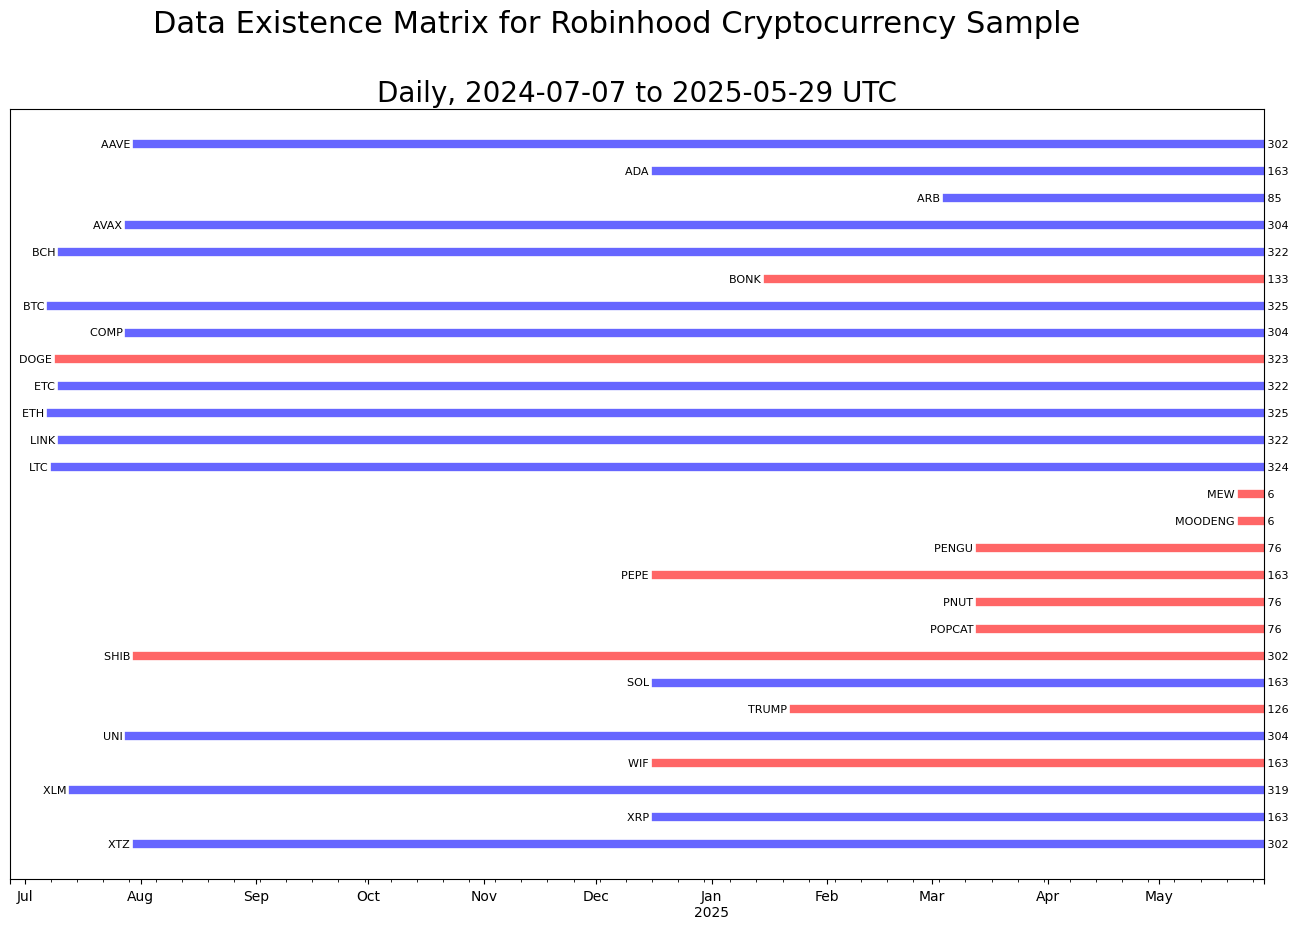

In [3]:
# data existence matrix
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
meme_coins="BONK,DOGE,PENGU,PEPE,PNUT,POPCAT,SHIB,TRUMP,WIF,MEW,MOODENG".split(",")

(df:=data.apply(lambda x:pd.Series(x.items(),index=x.index).apply(lambda y:np.nan if np.isnan(y[1]) else list(reversed(data.columns)).index(y[0])),axis=1)).plot(
    ax=plot,
    legend=False,
    color=list(map(lambda c:"red" if c in meme_coins else "blue",df.columns)),
    linewidth=6,
    alpha=0.6
)
plot.set_xlabel(None)
figure.suptitle(title:='Data Existence Matrix for Robinhood Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (data.index[0],data.index[-1]),fontsize=20)
plot.yaxis.set_visible(False)

for coin in data:
    plot.text(x:=df[coin].first_valid_index(),y:=df.loc[x,coin],coin+'  ',fontsize=8,ha='right',va='center')
    plot.text(xx:=df[coin].last_valid_index(),y," {:,d}".format((xx-x).n),fontsize=8,ha='left',va='center')

plot.set_xlim(df.index[0]-10,None)
figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

17:35:00 Wrote figure to 'Cumulative Return for Retail Cryptocurrency Sample.png'.


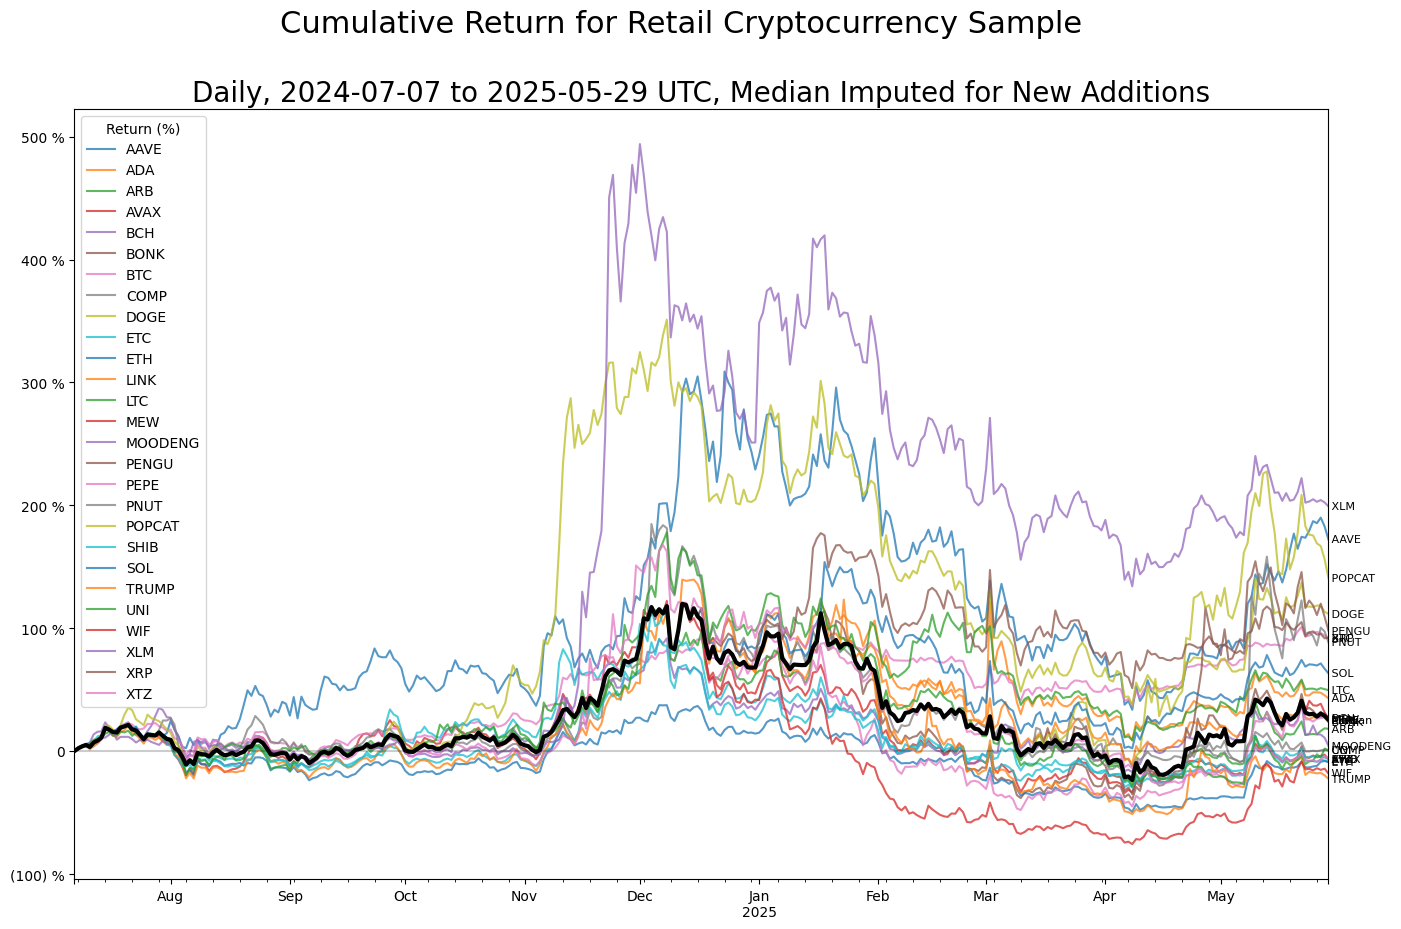

In [4]:
factor=(one+data/hundred)

for k,v in sorted(zip((s:=factor.apply(lambda x:x.first_valid_index()-1)).values,s.index),key=lambda x:x[0]):
    factor.loc[k,v]=m if not np.isnan(m:=factor.cumprod().loc[k].median()) else one

factor=factor.cumprod()*hundred-hundred
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
factor.plot(ax=plot,alpha=0.75)
factor['Median']=factor.median(axis=1)
factor['Median'].plot(ax=plot,color='black',linewidth=3)

plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Cumulative Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC, Median Imputed for New Additions" % (factor.index[0],factor.index[-1]),fontsize=20)

for c in factor:
    plot.text(x:=factor.index[-1],y:=factor.loc[x,c]," "+c,fontsize=8,ha='left',va='center')

figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

17:35:07 Excluding recently listed coins from analysis: MEW, MOODENG...
17:35:09 Wrote figure to 'Mean Return for Retail Cryptocurrency Sample.png'.


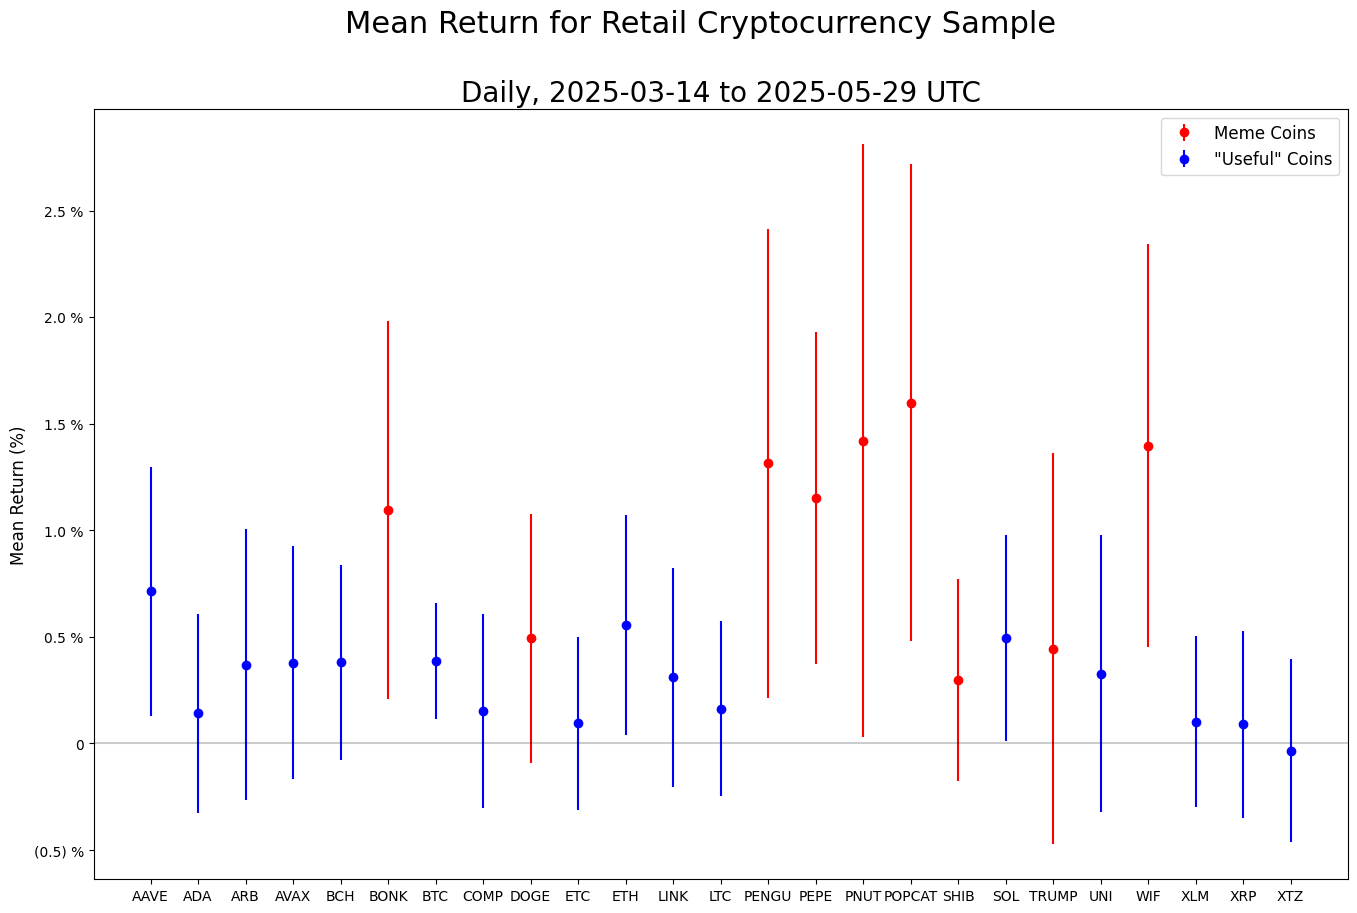

In [5]:
from scipy.stats import spearmanr,norm
from statsmodels.api import OLS
from statsmodels.tools import add_constant

nprint("Excluding recently listed coins from analysis: %s..." % ", ".join(c:=(data.index[-1]-data.apply(lambda x:x.first_valid_index(),axis=0)).apply(lambda x:np.nan if x.n>60 else x.n).dropna().index))

report=pd.DataFrame({ # drop recently listed coins and then drop na's, to ensure we have sufficient history for this analysis
    "Median":(design:=data.drop(columns=c).dropna(axis=0).sort_index()).median(), # sort index not needed, but let's do it anyway
    "Mean":(m:=design.mean()),
    "Std.Dev.":design.std(),
    "Sample":design.count(),
    "Std.Err.":(e:=design.std()/np.sqrt(design.count())),
    "t Statistic":(z:=m/e),
    "p Value":(p:=z.apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))),
    "Significance":p.apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else ""),
    "Symbol Rank":list(range(1,m.index.shape[0]+1)),
    "Meme Coin":[one if t in meme_coins else zero for t in m.index]
})

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=report.index,y:=report["Mean"],alpha=0,label=None)
plot.errorbar(x:=report[report["Meme Coin"]==one].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Red",label='Meme Coins')
plot.errorbar(x:=report[report["Meme Coin"]==zero].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Blue",label='"Useful" Coins')
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Mean Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (design.index[0],design.index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.set_ylabel("Mean Return (%)",fontsize=12)
plot.legend(fontsize=12)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

In [6]:
from statsmodels.formula.api import ols as OLSformula
from statsmodels.stats.anova import anova_lm

nprint("One Way ANOVA Analysis by {}".format(group_name:="Meme Coin"))
anova=anova_lm(OLSformula("Mean ~ {:s}".format(group_name.replace(" ","_")),report.rename(columns={c:c.replace(" ","_") for c in report})).fit(),typ=2).rename(columns={'sum_sq':'Sum of Squares','df':'d.o.f.','PR(>F)':'p Value','F':'F Statistic'})
anova['Significance']=anova['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
anova.index=['Between Groups','Within Groups']
anova.index.name='Variation'
display(anova.replace(np.nan,""))

17:35:09 One Way ANOVA Analysis by Meme Coin


,Sum of Squares,d.o.f.,F Statistic,p Value,Significance
Variation,,,,,
Between Groups,3.110045,1.0,28.829972,0.000019,***
Within Groups,2.481134,23.0,,,


In [34]:
(r:=report[["Mean",group_name]].groupby(group_name).mean()).index=["Useful Coin","Meme Coin"]
display(r)

,Mean
Useful Coin,0.288873
Meme Coin,1.023678


In [70]:
report=pd.DataFrame([v.melt().describe().rename(columns={"value":k}).iloc[:,0] for k,v in [("Meme Coins",data[meme_coins]),('"Useful" Coins',data.drop(columns=meme_coins))]])
report.rename(columns={"count":"Sample","std":"Std.Dev.","min":"Minimum","max":"Maximum","mean":"Mean"},inplace=True)
report["Std.Err."]=report["Std.Dev."]/np.sqrt(report["Sample"])
report["t Statistic"]=report["Mean"]/report["Std.Err."]
report["p Value"]=report["t Statistic"].apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))
report["Significance"]=report["p Value"].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
display(report)

,Sample,Mean,Std.Dev.,Minimum,25%,50%,75%,Maximum,Std.Err.,t Statistic,p Value,Significance
Meme Coins,1461.0,0.224551,7.334931,-24.387591,-3.493671,-0.320613,3.189793,76.138701,0.191898,1.170155,0.241938,
"""Useful"" Coins",4365.0,0.164626,5.078730,-24.901097,-2.424439,0.024814,2.305499,72.703105,0.076871,2.141588,0.032227,*
